##  Model Training Start

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
### Load cleaned Dataset


In [4]:
# Load the cleaned dataset from Notebook 2
df = pd.read_csv("data/processed/twitter_depression_cleaned.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (20000, 2)


,post_text,label
0,year since diagnosed anxiety depression today ...,1
1,sunday need break im planning spend little tim...,1
2,awake tired need sleep brain idea,1
3,rt retro bear make perfect gift great beginner...,1
4,hard say whether packing list making life easi...,1


In [5]:
df['post_text'] = df['post_text'].fillna("")

In [6]:
X=df['post_text']
y=df['label']

X_train,X_test,y_train,y_test= train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print("Train size:", X_train.shape[0])
print("Test size",X_test.shape[0])


Train size: 16000
Test size 4000


In [7]:
# Drop or replace NaN before vectorization
X_train = X_train.fillna("")
X_test = X_test.fillna("")


In [8]:
# Convert text into numeric features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Shape of TF-IDF train matrix:", X_train_tfidf.shape)


Shape of TF-IDF train matrix: (16000, 5000)


🧠 Samajhne ka tareeka:

Har row = ek tweet

Har column = ek word

Number = us word ka importance score in that tweet

Example:

Tweet 2 me word "anyone" ka score 0.61 → important for that tweet.

Tweet 4 me word "spell" ka score 0.77 → bahut unique word, high importance.

🔍 TF-IDF me "unique words" ka source

Dataset ke saare sentences uthaye jaate hain (jitna tumne vectorizer ko diya).
Example:

"hey dumbass spell check"

"rt imagine thinking anyone young justice straight"

Vectorizer pehle tokenization karta hai → matlab saare sentences tod kar shabdon ki list banata hai.

"hey dumbass spell check" → ["hey","dumbass","spell","check"]

"rt imagine thinking anyone young justice straight" → ["rt","imagine","thinking","anyone","young","justice","straight"]

Fir ye saari lists mila kar ek dictionary of unique words ban jaati hai (jise vocabulary bolte hain).

Vocabulary = {“hey”, “dumbass”, “spell”, “check”, “rt”, “imagine”, “thinking”, “anyone”, …}

Tumne code me max_features=15 diya tha → matlab sirf top 15 unique words rakho (jo sabse important nikle).

👉 Isi vocabulary se hi columns bante hain TF-IDF matrix me.

🧠 Why scores differ (importance)?

TF (Term Frequency) → ek tweet me word kitni baar aaya.

IDF (Inverse Document Frequency) → wo word kitne aur tweets me aaya.

Rare words (jaise "spell") ka score high hoga.

Har jagah repeat hone wale words (jaise "rt", "the") ka score low hoga.

✅ To simple answer:
Ye unique words tumhare dataset se hi nikal rahe hain → TF-IDF vectorizer sab tweets ko tod kar dictionary banata hai, aur fir us dictionary ke basis pe numeric matrix bana deta hai.

In [9]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2000
           1       0.77      0.75      0.76      2000

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



📘 Logistic Regression in Text Classification (Notes)
🔹 Pipeline Overview

Dataset

Sentences (text data) + Labels (e.g., Depressed = 1, Not Depressed = 0).

Vectorization (TF-IDF)

Convert text → numeric features.

Common words → low weight.

Rare & meaningful words → high weight.

Logistic Regression (Classifier)

Learns weights (importance) for each feature (word/phrase).

Uses sigmoid function to output probability.

Decides class based on probability threshold (default = 0.5).

Evaluation

Metrics: precision, recall, f1-score, accuracy.

Tools: classification_report, confusion matrix, ROC, PR curves.

🔹 Logistic Regression Role

Acts as the decision maker in the pipeline.

Equation:

𝑧
=
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
.
.
.
+
𝑏
z=w
1
	​

x
1
	​

+w
2
	​

x
2
	​

+...+b
𝑃
(
𝑦
=
1
∣
𝑥
)
=
1
1
+
𝑒
−
𝑧
P(y=1∣x)=
1+e
−z
1
	​


Interpretation:

If 
𝑃
≥
0.5
P≥0.5 → Predict Depressed (1).

If 
𝑃
<
0.5
P<0.5 → Predict Not Depressed (0).

🔹 Example

Sentence: "I feel very sad today"

TF-IDF vector → [feel=0.4, sad=0.8, happy=0.0]

Model weights → [feel=0.1, sad=2.0, happy=-2.5]

Score:

𝑧
=
0.1
∗
0.4
+
2.0
∗
0.8
+
(
−
2.5
∗
0.0
)
+
𝑏
z=0.1∗0.4+2.0∗0.8+(−2.5∗0.0)+b

Sigmoid output ≈ 0.9 → 90% chance Depressed ⇒ Class = 1.

🔹 Visual Insights

Confusion Matrix → Shows correct vs incorrect predictions.

ROC Curve → Trade-off between TPR & FPR, AUC score.

Precision-Recall Curve → Useful for imbalanced data.

Top Coefficients → Which words strongly indicate Depressed vs Not Depressed.

🔹 Analogy

Logistic Regression = Judge 👩‍⚖️

Words (features) = Proofs/Evidences 📝

Each proof has weight (importance).

Judge adds up proofs → calculates confidence (probability).

Gives final verdict: Depressed / Not Depressed.

👉 Ye notes tumhare resume/project report/college explanation me directly use ho sakte hain.

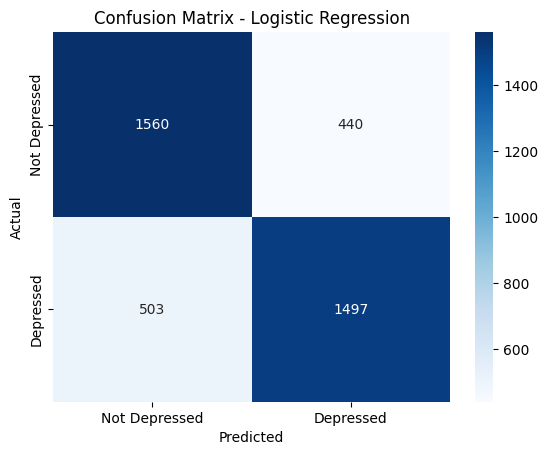

In [10]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed','Depressed'],
            yticklabels=['Not Depressed','Depressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [11]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluation
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2000
           1       0.76      0.80      0.78      2000

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2000
           1       0.74      0.72      0.73      2000

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [14]:
# Logistic Regression metrics
lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

# Naive Bayes metrics
nb_metrics = {
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1-Score": f1_score(y_test, y_pred_nb)
}

# Random Forest metrics
rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}


In [15]:
results_df = pd.DataFrame([lr_metrics, nb_metrics, rf_metrics])
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression   0.76425   0.772845  0.7485  0.760478
1          Naive Bayes   0.77025   0.756526  0.7970  0.776236
2        Random Forest   0.73700   0.742828  0.7250  0.733806


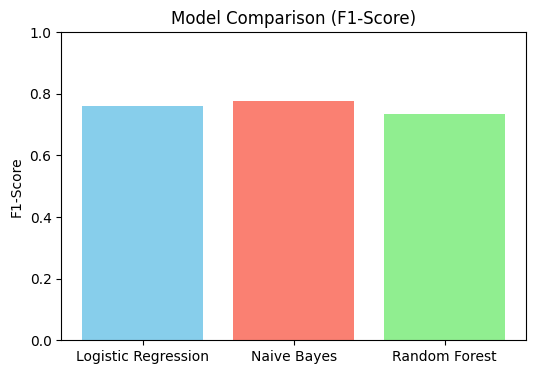

In [16]:
import matplotlib.pyplot as plt

# Bar chart for F1-Score comparison
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["F1-Score"], color=['skyblue','salmon','lightgreen'])
plt.title("Model Comparison (F1-Score)")
plt.ylabel("F1-Score")
plt.ylim(0,1)   # scores range 0–1
plt.show()


In [17]:
import os
os.makedirs("data/predictions", exist_ok=True)

# Save predictions + true labels
preds_df = pd.DataFrame({
    "y_test": y_test,
    "LogReg": y_pred_lr,
    "NaiveBayes": y_pred_nb,
    "RandomForest": y_pred_rf
})

preds_df.to_csv("data/predictions/model_predictions.csv", index=False)
print("✅ Predictions saved to data/predictions/model_predictions.csv")


✅ Predictions saved to data/predictions/model_predictions.csv
